In [122]:
#import libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Data

In [123]:
file1 = "/Users/ayadav/Downloads/ACME-HappinessSurvey2020.csv"

In [124]:
df = pd.read_csv(file1)

In [125]:
df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [126]:
df.shape

(126, 7)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


There were no null values. All the enteries was numerical

In [128]:
df.head(5)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [129]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [130]:
class_df = df.groupby('Y').count()
class_df.style.background_gradient(cmap='winter')

,X1,X2,X3,X4,X5,X6
Y,,,,,,
0,57,57,57,57,57,57
1,69,69,69,69,69,69


#### All the fetures were grouped based on customer satisfied or not. Found around half of the customer are satified and rest are not. 

#  Data Visualization 

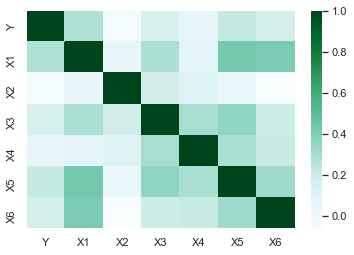

In [131]:
sns.heatmap(df.corr(), cmap='BuGn')

#### heat map was done to see the correlation between features vs target. based on above heatmap, X2 is least affecting features for prediction whereas X1 is the most.

## Machine Learning

In [132]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Separate out the features and targets
features = df.drop(columns='Y')
targets = pd.DataFrame(df['Y'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 6)
(26, 6)
(100, 1)
(26, 1)


## Pycaret Module

In [133]:
#load the pycaret module
from pycaret.classification import *
data = df.sample(frac=0.95, random_state=486)
data_unseen = df.drop(df.index)
df.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (120, 7)
Unseen Data For Predictions: (0, 7)


In [134]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'Y',session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(120, 7)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [135]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Random Forest Classifier,0.6861,0.6546,0.7200,0.7583,0.7158,0.3551,0.3798,0.1116
1,CatBoost Classifier,0.6611,0.6462,0.7400,0.6850,0.6960,0.2975,0.3068,0.7378
2,Decision Tree Classifier,0.6458,0.6448,0.6700,0.7033,0.6727,0.2810,0.2985,0.0031
3,Light Gradient Boosting Machine,0.6444,0.6229,0.7600,0.6798,0.7016,0.2671,0.2915,0.0087
4,Ridge Classifier,0.6278,0.0000,0.7050,0.6905,0.6868,0.2230,0.2163,0.0040
5,Gradient Boosting Classifier,0.6264,0.6275,0.6400,0.7367,0.6391,0.2400,0.2741,0.0440
6,SVM - Linear Kernel,0.6083,0.0000,0.6000,0.7048,0.6047,0.2129,0.2480,0.0028
7,Linear Discriminant Analysis,0.6083,0.6100,0.6750,0.7071,0.6506,0.1913,0.2096,0.0032
8,Extreme Gradient Boosting,0.6014,0.6358,0.6750,0.6500,0.6412,0.1798,0.2026,0.0193
9,Logistic Regression,0.5931,0.5867,0.7300,0.6548,0.6747,0.1507,0.1382,0.0068


## Declare feature vector and target variable

In [136]:
X = df.drop(['Y'], axis=1)

y = df['Y']

In [137]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


## Random Forest Classifier model with default parameters 

In [138]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)
# Predict the Test set results

y_pred = rfc.predict(X_test)

from pprint import pprint

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Model accuracy score with 10 decision-trees : 0.5952
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


## Random Forest Classifier model with parameter n_estimators=100

In [139]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [140]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=30, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))


Model accuracy score with 100 decision-trees : 0.6190


In [141]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [142]:
# Make predictions for the test set
y_pred_test = forest.predict(X_test)
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.5952380952380952

## Feature Importance

In [143]:
# create the classifier with n_estimators = 50

clf = RandomForestClassifier(n_estimators=50, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [144]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

X1    0.194337
X3    0.175602
X2    0.168605
X4    0.161387
X5    0.159336
X6    0.140732
dtype: float64

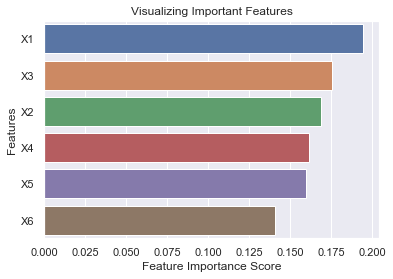

In [145]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')
# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

## Build Random Forest model on selected features 

In [146]:
# declare feature vector and target variable

X = df.drop(['Y', 'X6'], axis=1)

y = df['Y']

In [147]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [148]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=2, n_estimators = 50)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)
# Check accuracy score 

print('Model accuracy score with X6 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with X6 variable removed : 0.6429


In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import shap

## Declare feature vector and target variable for Gradient boosting Model

In [150]:
X = df.drop(['Y'], axis=1)

y = df['Y']

In [151]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


## Gradient boosting  Model with default parameter 

In [152]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [153]:
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

# define dataset
X = df.drop(['Y'], axis=1)

y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2)



In [154]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [155]:
from sklearn.model_selection import GridSearchCV
n_estimators=[100,500,1000]
learning_rate=[0.01,0.1,1]
max_depth=[2,3,5]
params2={'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth}
grid_gbc=GridSearchCV(gbc,param_grid=params2)

In [156]:
grid_gbc.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [157]:
grid_gbc.best_params_

{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}

In [158]:
gbclf=GradientBoostingClassifier(learning_rate=0.01,max_depth=5,n_estimators=500)
gbclf.fit(X,y)
print(gbclf.score(X,y))
print(gbclf.score(X_train,y_train))
print(gbclf.score(X_test,y_test))

0.9365079365079365
0.9404761904761905
0.9285714285714286


#### We got 92% of accuracy with Gradient Boosting classifier which is better compare to random forest. 

## Feature Selection

In [159]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X = df.drop(['Y'], axis=1)

y = df['Y']
# define feature selection
fs = SelectKBest(score_func=f_classif, k=5)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(126, 5)


In [160]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
X = df.drop(['Y'], axis=1)

y = df['Y']
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[10.562  0.073  2.887  0.517  6.583  3.587]
[[3 3 2 4]
 [3 3 4 3]
 [5 3 3 5]
 [5 3 3 5]
 [5 3 3 5]]


### As per feature selection, X2 is least important features for prediction whereas X1 is the most important.